# Quando eu voo

A base de dados quando eu voo é resultado de uma raspagem de preços de passagens aéreas no website da GOL e LATAM, utilizando a biblioteca selenium em Python foi possível coletar dados de passagens partindo de São Paulo para diversos destinos no dia 01/12.
Como análise escolhida para esses modelos preditivos agrupamos por regiões para facilitar a visualização dos dados



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd

In [4]:
#Conexão com Mysql
conn = mysql.connector.connect(user='root', password='root', host='127.0.0.1', database='quando_eu_voo')
cursor = conn.cursor()
cursor.execute("""select passagem.dataPesquisa, voo.destino, voo.destinoSigla, voo.regiao, passagem.companhia, AVG(passagem.media)
                    from passagem
                    INNER JOIN voo ON passagem.idVoo = voo.idVoo
                    where passagem.companhia = "LATAM"
                    and voo.regiao = "S"
                    group by passagem.dataPesquisa 
                    order by passagem.dataPesquisa;""")

medias = cursor.fetchall()

conn.close()

#Pandas dataFrame
df_medias = pd.DataFrame(medias, columns=['data da pesquisa', 'destino', 'sigla', 'regiao','companhia','valor'])

##Aqui conectamos com o banco já fazendo o agrupamento por região e companhia desejada 

# Modelos Preditivos:


Foi utilizado o exemplo da região sul do Brasil pela companhia LATAM.
 
 - Preço 
 - Dias de Pesquisa

In [5]:
df_poli = df_medias
# Adicionando um dummy
df_poli['Time'] = np.arange(len(df_poli.index))
df_poli['valor'] = df_poli['valor'].astype('float')

# Regressão Linear

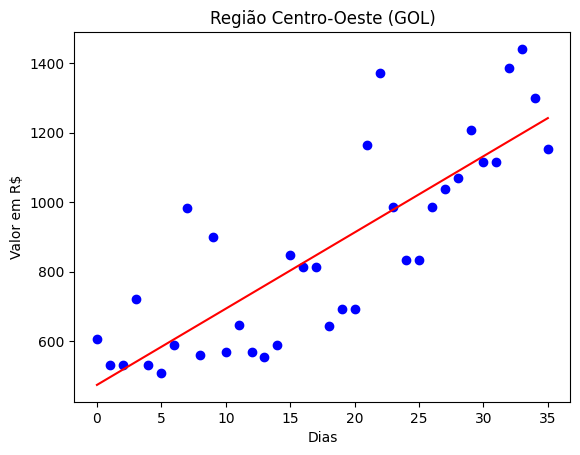

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = df_poli.loc[:, ['Time']]  # features
y = df_poli.loc[:, ['valor']]  # target

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
  
lin.fit(X, y)


# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Região SUL (LATAM)')
plt.ylabel('Valor em R$')
plt.xlabel('Dias')
  
plt.show()

# Regressão Polinomial

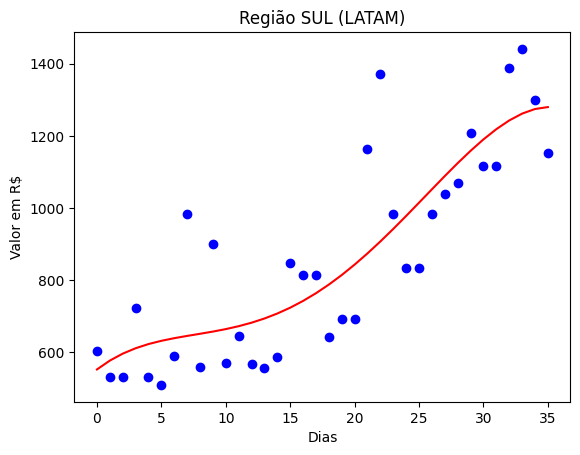

In [7]:

plt.scatter(X, y, color = 'blue')

# Polinomial  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Região SUL (LATAM)')
plt.ylabel('Valor em R$')
plt.xlabel('Dias')
  
plt.show()